In [1]:
import sys
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from numpy import mean
from numpy import std
%matplotlib inline

In [2]:
# import preprocessed dataset
dataset = pd.read_csv("dataset_processed.csv")

In [3]:
dataset.head()

,IN3,IN2,IN1,IN0,PP,PG,VP,VG,R4,Slope,Anomaly,AffectedComponent,Situation,OperationalScenario,CombinedAffectedComponent,CombinedSituation
0,0.0,0.0,0.0,0.0,0,0,0,0,9986,0.000000,No,None,Normal,Normal,None,Normal
1,0.0,0.0,0.0,0.0,0,0,0,0,9987,0.021277,No,None,Normal,Normal,None,Normal
2,0.0,0.0,0.0,0.0,0,0,0,0,9985,-0.021277,No,None,Normal,Normal,None,Normal
3,0.0,0.0,0.0,0.0,0,0,0,0,9986,0.000000,No,None,Normal,Normal,None,Normal
4,0.0,0.0,0.0,0.0,0,0,0,0,9986,-0.010638,No,None,Normal,Normal,None,Normal


In [4]:
#null
dataset = dataset.dropna()

In [5]:
#Features & Output Split
X = dataset.iloc[:, 0: 10]
y = dataset.iloc[:, 10]

# Correalted Features 

In [6]:
#!pip install phik
import phik

interval columns not set, guessing: ['IN3', 'IN2', 'IN1', 'IN0', 'PP', 'PG', 'VP', 'VG', 'R4', 'Slope']


E:\ProgramDATA\new\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable VP for analysis 1. Dropping this column
  warnings.warn(
E:\ProgramDATA\new\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable VG for analysis 1. Dropping this column
  warnings.warn(


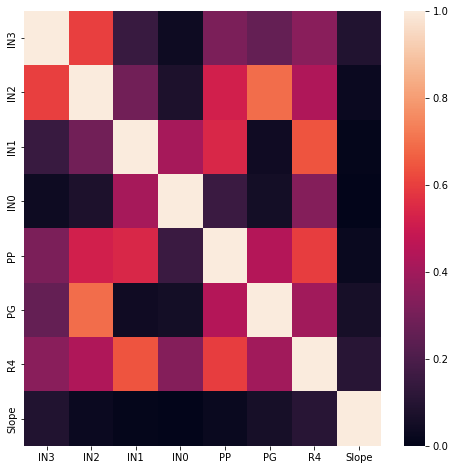

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(X.phik_matrix())
plt.show()

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IN3     15265 non-null  float64
 1   IN2     15265 non-null  float64
 2   IN1     15265 non-null  float64
 3   IN0     15265 non-null  float64
 4   PP      15265 non-null  int64  
 5   PG      15265 non-null  int64  
 6   VP      15265 non-null  int64  
 7   VG      15265 non-null  int64  
 8   R4      15265 non-null  int64  
 9   Slope   15265 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.3 MB


In [9]:
y

0         No
1         No
2         No
3         No
4         No
        ... 
15261    Yes
15262    Yes
15263    Yes
15264    Yes
15265    Yes
Name: Anomaly, Length: 15265, dtype: object

In [10]:
y = y.astype('category').cat.codes

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 0)

# DT features visualization 

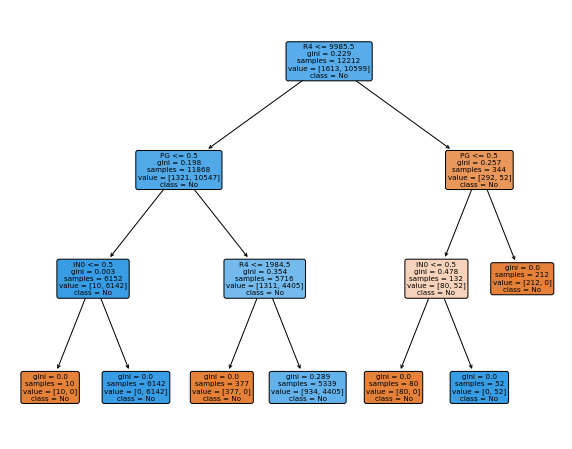

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
plt.rcParams['figure.figsize'] = (10, 8)

# fit the classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
tree.plot_tree(clf);

tree.plot_tree(clf,
               feature_names = dataset.columns, 
               class_names=dataset.Anomaly,
               rounded=True, 
               filled = True);

In [13]:
#!pip install dtreeviz

In [14]:
# from dtreeviz.trees import *
# viz = dtreeviz(clf, 
#                x_data=X_train,
#                y_data=y_train,
#                target_name='class',
#                feature_names=dataset.columns, 
#                class_names=list(dataset.Anomaly), 
#                title="Decision Tree - Scada dataset")
# viz

In [15]:
X_train.shape

(12212, 10)

In [16]:
y_train

8896     1
9997     1
2457     1
13920    1
1559     0
        ..
13123    1
3264     1
9845     1
10799    1
2732     1
Length: 12212, dtype: int8

In [17]:
X_test.shape

(3053, 10)

In [18]:
y_test

4284     1
9874     1
13611    1
13496    1
6003     1
        ..
5495     1
6554     1
13507    1
8860     1
1083     0
Length: 3053, dtype: int8

# Feature Importance 

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

TOP_FEATURES = 10

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 5 (0.413830)
2. feature 3 (0.207670)
3. feature 8 (0.192373)
4. feature 9 (0.059661)
5. feature 1 (0.058878)
6. feature 4 (0.030022)
7. feature 2 (0.026377)
8. feature 0 (0.011189)
9. feature 7 (0.000000)
10. feature 6 (0.000000)


In [20]:
#fe = ['IN3','IN2','IN1','PP','PG','VP','VG','R4','Slope']

# sensor 1 
# sensor 2
# sensor 3
# pulp value 
# pulb status 
# pulp 2 value 
# pulb 2 status 
# reg4 value 
# slope

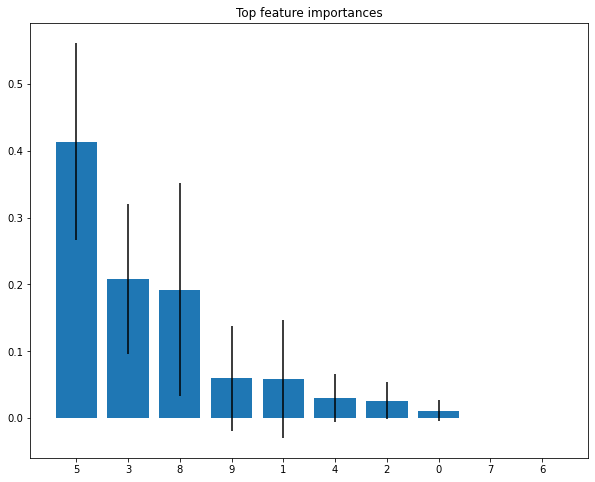

In [21]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [22]:
#Normalization keep the data between certin range like 0 and 1 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # fit + transform 
X_test = sc_X.transform(X_test)

# 1- Logestic Regression 

In [23]:
linear_classifier = LogisticRegression(random_state = 0 , max_iter=10000)
linear_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [24]:
y_pred = linear_classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test ,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.06      0.12       388
           1       0.88      1.00      0.94      2665

    accuracy                           0.88      3053
   macro avg       0.86      0.53      0.53      3053
weighted avg       0.87      0.88      0.83      3053



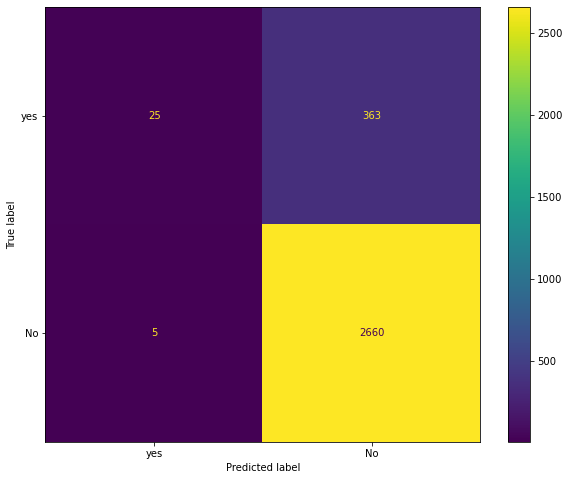

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
target_names = ['yes', 'No']

matrix = plot_confusion_matrix(linear_classifier , X_test , y_test , display_labels=target_names)

plt.show(matrix)
plt.show()

# 2- Decision Tree

In [27]:
 #6- Decision Tree
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)

decision_tree_classifier.fit(X_train, y_train)    

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [28]:
y_pred = decision_tree_classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test ,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       388
           1       0.96      0.96      0.96      2665

    accuracy                           0.94      3053
   macro avg       0.86      0.86      0.86      3053
weighted avg       0.94      0.94      0.94      3053



# 3- Random Forest

In [30]:
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)

random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [31]:
y_pred_rf = random_forest_classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print("Classification Report RF")
print(classification_report(y_test ,y_pred_rf))

Classification Report RF
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       388
           1       0.97      0.97      0.97      2665

    accuracy                           0.94      3053
   macro avg       0.87      0.88      0.88      3053
weighted avg       0.94      0.94      0.94      3053



In [33]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [34]:
# load pkl file 
pickle.dump(random_forest_classifier, open('rf.pkl', 'wb'))

In [35]:
# read pkl file 
pkl_rf = open('rf.pkl', 'rb')
mydict2 = pickle.load(pkl_rf)

In [36]:
# predict pkl file 
pred = mydict2.predict(X_test)
for i in pred:
    if i == 1:
        print("normal ")
    else :
        print("abnormal")

normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
abnormal
abnormal
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 


normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
abnormal
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 


normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
abnormal
normal 
normal 
normal 
normal 
normal 
normal 
normal 
normal 
no

# 4- K-fold cross validation 

In [37]:
# import image module
from IPython.display import Image

# get the image
Image(url="cross.png", width=1000, height=1000)

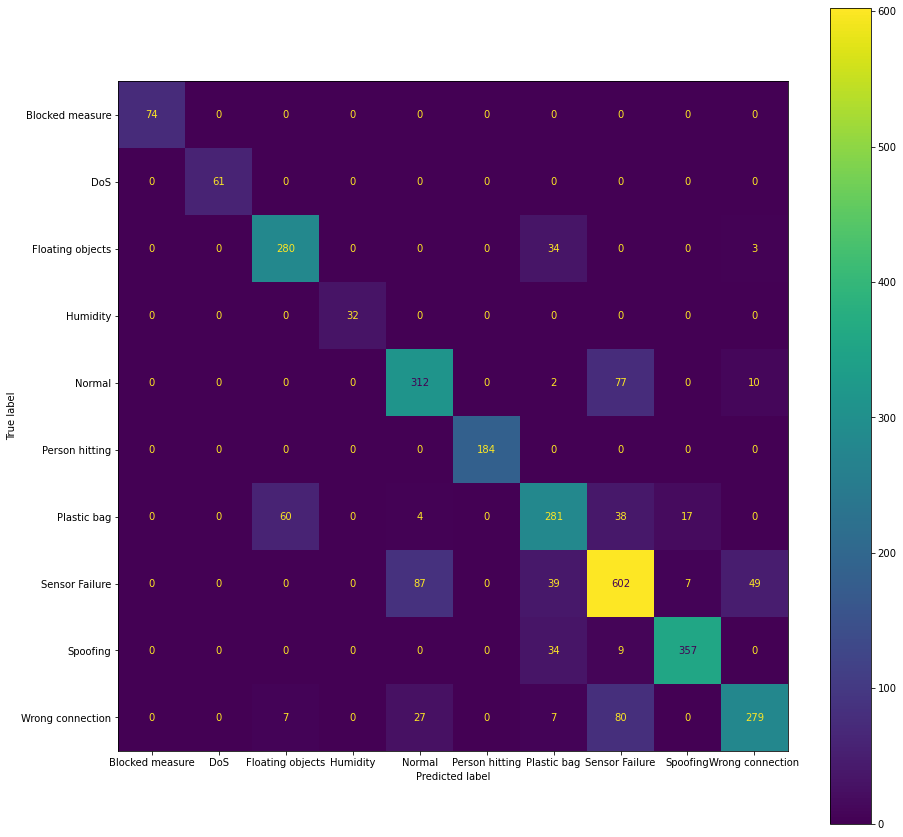


 #######fold number######## 0
Classification Report RF
                  precision    recall  f1-score   support

 Blocked measure       1.00      1.00      1.00        74
             DoS       1.00      1.00      1.00        61
Floating objects       0.81      0.88      0.84       317
        Humidity       1.00      1.00      1.00        32
          Normal       0.73      0.78      0.75       401
  Person hitting       1.00      1.00      1.00       184
     Plastic bag       0.71      0.70      0.71       400
  Sensor Failure       0.75      0.77      0.76       784
        Spoofing       0.94      0.89      0.91       400
Wrong connection       0.82      0.70      0.75       400

        accuracy                           0.81      3053
       macro avg       0.87      0.87      0.87      3053
    weighted avg       0.81      0.81      0.81      3053



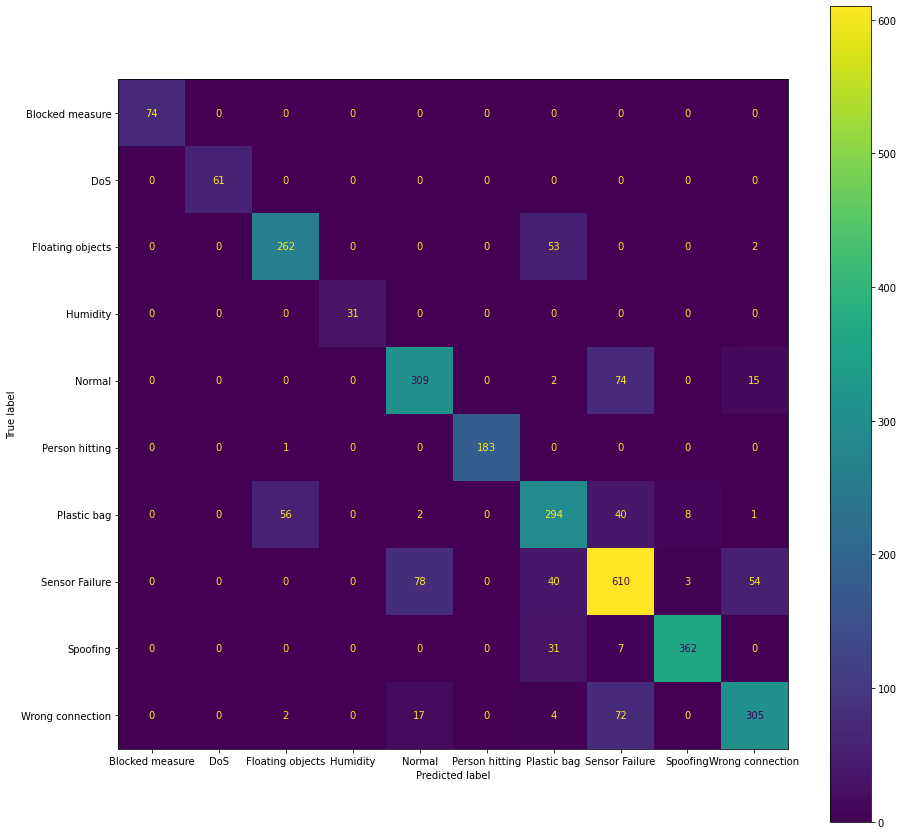


 #######fold number######## 1
Classification Report RF
                  precision    recall  f1-score   support

 Blocked measure       1.00      1.00      1.00        74
             DoS       1.00      1.00      1.00        61
Floating objects       0.82      0.83      0.82       317
        Humidity       1.00      1.00      1.00        31
          Normal       0.76      0.77      0.77       400
  Person hitting       1.00      0.99      1.00       184
     Plastic bag       0.69      0.73      0.71       401
  Sensor Failure       0.76      0.78      0.77       785
        Spoofing       0.97      0.91      0.94       400
Wrong connection       0.81      0.76      0.79       400

        accuracy                           0.82      3053
       macro avg       0.88      0.88      0.88      3053
    weighted avg       0.82      0.82      0.82      3053



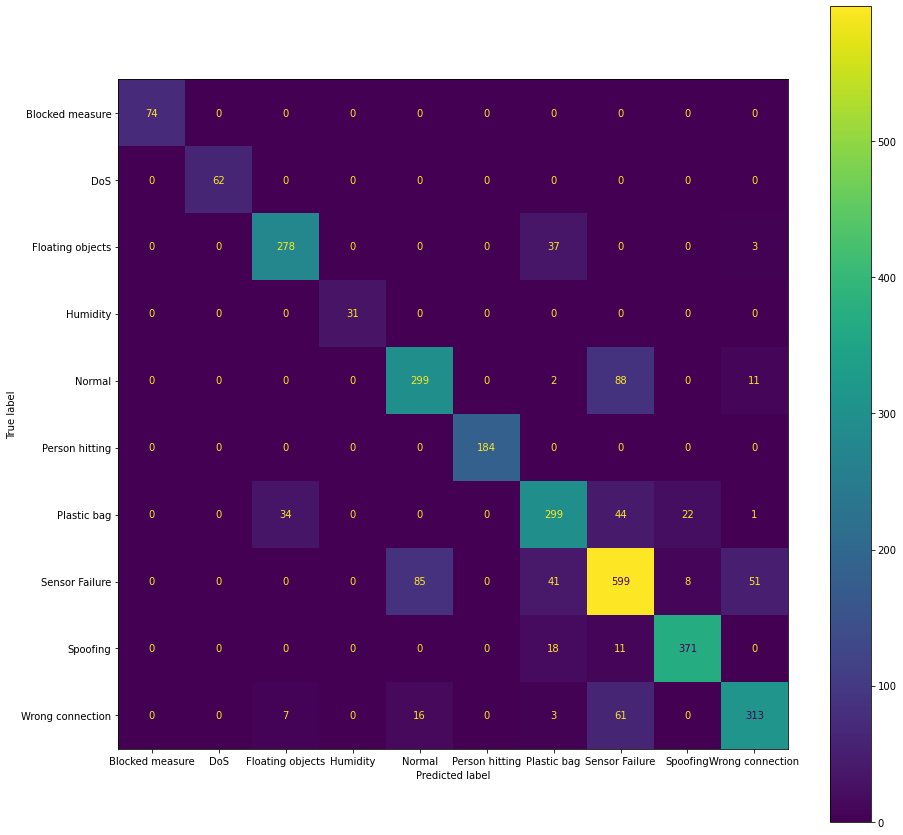


 #######fold number######## 2
Classification Report RF
                  precision    recall  f1-score   support

 Blocked measure       1.00      1.00      1.00        74
             DoS       1.00      1.00      1.00        62
Floating objects       0.87      0.87      0.87       318
        Humidity       1.00      1.00      1.00        31
          Normal       0.75      0.75      0.75       400
  Person hitting       1.00      1.00      1.00       184
     Plastic bag       0.75      0.75      0.75       400
  Sensor Failure       0.75      0.76      0.75       784
        Spoofing       0.93      0.93      0.93       400
Wrong connection       0.83      0.78      0.80       400

        accuracy                           0.82      3053
       macro avg       0.89      0.88      0.89      3053
    weighted avg       0.82      0.82      0.82      3053



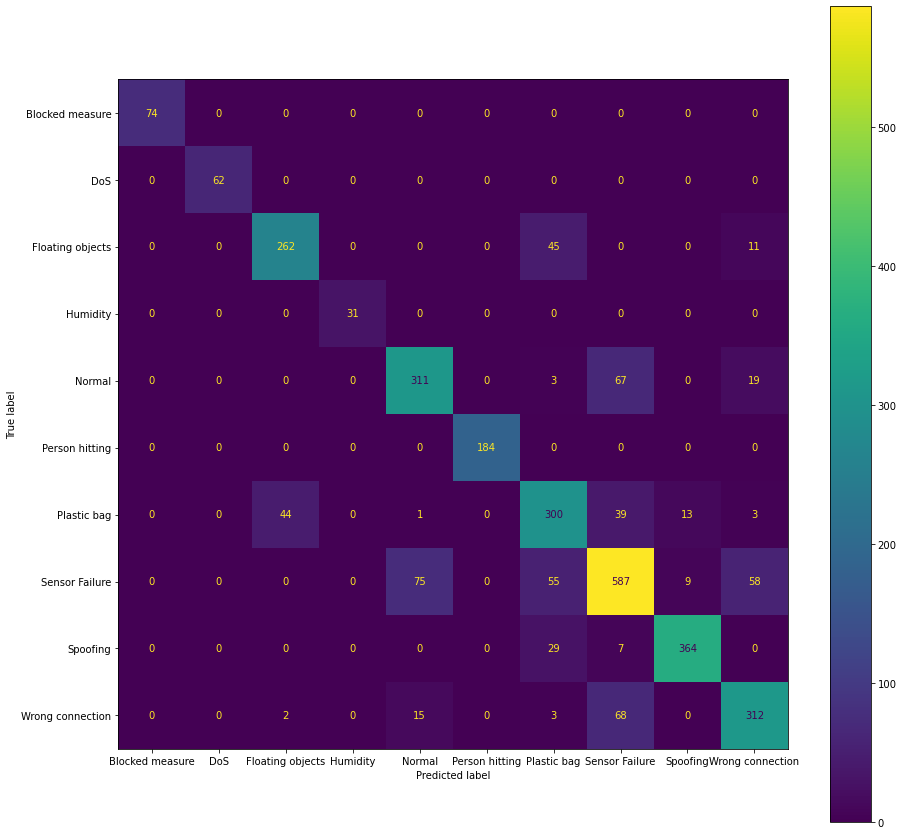


 #######fold number######## 3
Classification Report RF
                  precision    recall  f1-score   support

 Blocked measure       1.00      1.00      1.00        74
             DoS       1.00      1.00      1.00        62
Floating objects       0.85      0.82      0.84       318
        Humidity       1.00      1.00      1.00        31
          Normal       0.77      0.78      0.78       400
  Person hitting       1.00      1.00      1.00       184
     Plastic bag       0.69      0.75      0.72       400
  Sensor Failure       0.76      0.75      0.76       784
        Spoofing       0.94      0.91      0.93       400
Wrong connection       0.77      0.78      0.78       400

        accuracy                           0.81      3053
       macro avg       0.88      0.88      0.88      3053
    weighted avg       0.82      0.81      0.82      3053



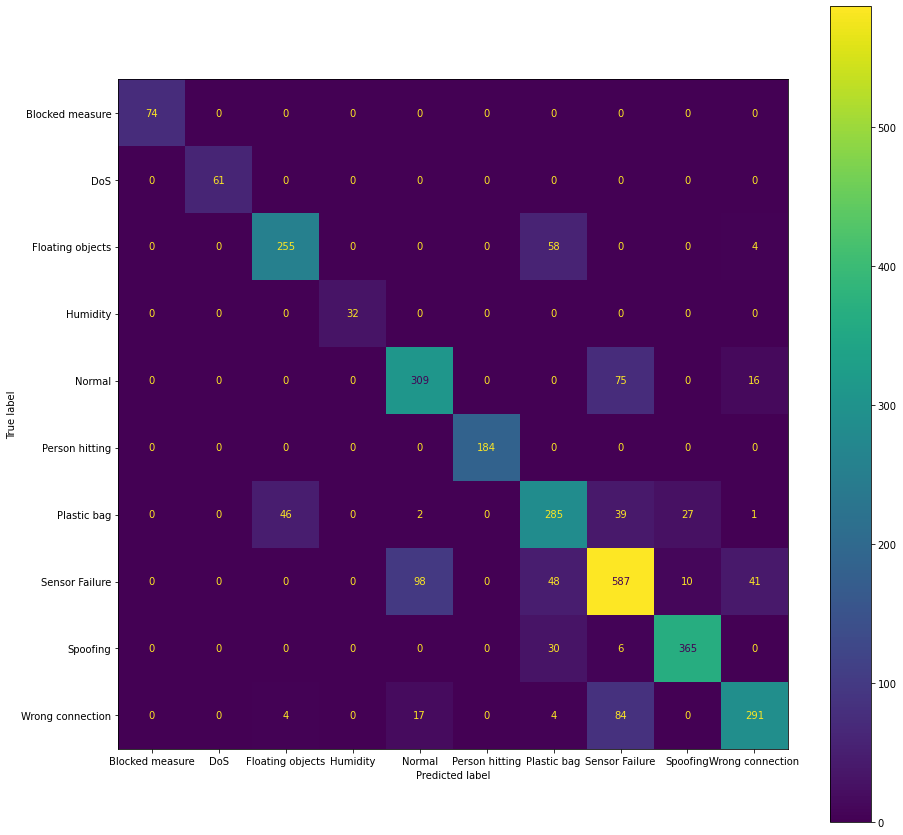


 #######fold number######## 4
Classification Report RF
                  precision    recall  f1-score   support

 Blocked measure       1.00      1.00      1.00        74
             DoS       1.00      1.00      1.00        61
Floating objects       0.84      0.80      0.82       317
        Humidity       1.00      1.00      1.00        32
          Normal       0.73      0.77      0.75       400
  Person hitting       1.00      1.00      1.00       184
     Plastic bag       0.67      0.71      0.69       400
  Sensor Failure       0.74      0.75      0.75       784
        Spoofing       0.91      0.91      0.91       401
Wrong connection       0.82      0.73      0.77       400

        accuracy                           0.80      3053
       macro avg       0.87      0.87      0.87      3053
    weighted avg       0.80      0.80      0.80      3053



In [38]:

random_state = 0
output_range = range(0,6)
dataset = dataset.dropna()
#Features & Output Split
X = dataset.iloc[:, 0: 10].values
y = dataset.iloc[:, 10: 16].values


index_of_y_to_classify = 5


kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)


counter = 0
for train, test in kfold.split(X, y[:, index_of_y_to_classify]):
    X_train = X[train]
    y_train = y[train, index_of_y_to_classify]
    X_test = X[test]
    y_test = y[test, index_of_y_to_classify]


    #Normalization
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)            

    # Begin Classification
    y_current_train = y_train
    y_current_test =  y_test

    #Random Forest
    random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = random_state)
    random_forest_classifier.fit(X_train, y_current_train)
    
    #confusion matrix
    fig, ax = plt.subplots(figsize=(15, 15))
    matrix = plot_confusion_matrix(random_forest_classifier , X_test , y_test ,ax=ax )
    plt.show(matrix)
    plt.show()

    accuracy_random_forest = pd.DataFrame(classification_report(y_current_test, random_forest_classifier.predict(X_test), output_dict = True)).transpose()
    print('\n','#######fold number########' , counter)
    print("Classification Report RF")
    print(classification_report(y_current_test ,random_forest_classifier.predict(X_test)))
    
    #print('\n','#######fold number########' , counter)
    #print(accuracy_random_forest)
    
    counter += 1

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [40]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

scores = cross_val_score(random_forest_classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [41]:
print(scores)

[0.81580025 0.80065493 0.82022932 0.81244881 0.80589681]


In [42]:
print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.811 


# Model Testing 

In [43]:
pickle.dump(random_forest_classifier, open('rf11.pkl', 'wb'))

In [44]:
test = pd.read_csv("E:\Juypter-files\AI_Projects\machine-learning-SCADA\machine-learning-SCADA\Copy.csv")

In [45]:
test.head()

,IN3,IN2,IN1,IN0,PP,PG,VP,VG,R4,Slope
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9986.0,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,0.021277
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
test=test.dropna()

In [47]:
# read pkl file 
pkl_rf = open('rf11.pkl', 'rb')
mydict2 = pickle.load(pkl_rf)
# predict pkl file 
pred = mydict2.predict(test)
print(pred)

['Wrong connection' 'Wrong connection' 'Wrong connection'
 'Wrong connection' 'Wrong connection' 'Wrong connection']


# Final Observation  

* the dataset is relatively small and contains only 10 features for the predication 
* feature importance shows that only 8 out of 10 features contribute positively to the predication 
* Best performed model is Random forest classifier 
* K-fold cross validation shows the final and best output of the RF model after setting k=5 , and the performance seems compelling  